In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from time import sleep

Написать программы (2 шт.), реализующие явную и неявную схемы
для уравнения

$$
\begin{array}{l}
u_t + (f(u))_x = \epsilon u_{xx} \\
u|_{t=0} = u_{t0}(x) \\
u|_{x=0} = u_{0}(t) \\
u|_{x=L} = u_{L}(t) \\
x \in [0,L]
\end{array}
$$

Входные данные (которые могут быть изменены по указанию преподавателя):
    
    Нелинейность f (u) (для отладки можно взять f (u) = u^2);
    u0(x) (для отладки можно взять u0(x) = th(−x));
    Начало и конец отрезка и его длина;
    Краевые условия;
    Время окончания вычислений T , t ∈ [0, T ].



# Явная схема

In [2]:
def borgar_expl(init, bound1, bound2, F_u, N, L, tau, T, k_eps, lims=None):
    
    
    # YOUR CODE HERE
    w_x, h = np.linspace(0, L, N+2, retstep=True)
    N_t = int(T / tau)
    u_0 = np.array([init(x) for x in w_x], dtype=np.float64)
    u_end = np.zeros(u_0.shape)
    eps = k_eps * h
    
    for t0 in range(1, N_t+1):
        u_end[0] = bound1(tau * t0)
        u_end[-1] = bound2(tau * t0)
        for m in range(1, N+1):
            fum = F_u(u_0[m])
            if fum > 0:
                u_end[m] = u_0[m] + tau * (eps / h ** 2 * (u_0[m+1] - 2 * u_0[m] + u_0[m-1]) - fum * (u_0[m] - u_0[m-1]) / h)
            else:
                u_end[m] = u_0[m] + tau * (eps / h ** 2 * (u_0[m+1] - 2 * u_0[m] + u_0[m-1]) - fum * (u_0[m+1] - u_0[m]) / h)
              
        u_0 = u_end.copy()
        if t0 % 5 == 0:
            clear_output(wait=True)
            plt.figure(figsize=(9,6))
            plt.plot(w_x, u_0)
            plt.title(fr'График функции в момент времени t = {t0} * $\Delta\tau$')
            if lims != None:
                plt.ylim(lims[0], lims[1])
            plt.show()
    return w_x, u_end

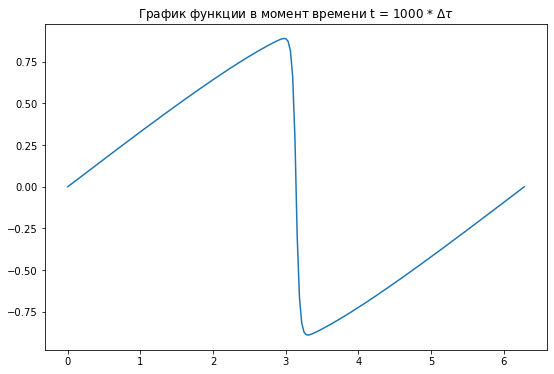

In [4]:
F_u = lambda u: u
w_x, u_0 = borgar_expl(lambda x: np.sin(x), lambda t: 0, lambda t: 0, lambda u: u, 200,
                     L=2*np.pi, tau=0.002, T=2, k_eps = 0.5)

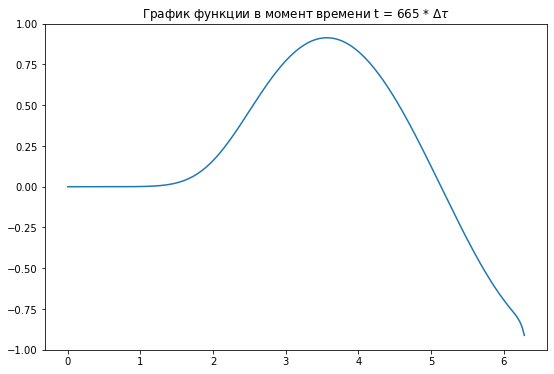

In [63]:
F_u = lambda u: u
w_x, u_0 = borgar_expl(lambda x: np.sin(x), lambda t: 0, lambda t: np.sin(2*np.pi-t), lambda u: u, 200,
                     L=2*np.pi, tau=0.003, T=2, k_eps = 1)

# Неявная схема

In [5]:
from scipy.linalg import solve_banded

def borgar_impl(init, bound1, bound2, F_u, N, L, tau, T, k_eps, lims=None):

    w_x, h = np.linspace(0, L, N+2, retstep=True)
    N_t = int(T / tau)
    u_0 = np.array([init(x) for x in w_x], dtype=np.float64)
    u_end = np.zeros(u_0.shape)
    c = tau / (h)
    eps = k_eps * h
    
    A = np.zeros((3, N))
    
    for t0 in range(1, N_t+1):
        u_end[0] = bound1(tau * t0)
        u_end[-1] = bound2(tau * t0)
        

        A[0] = c / 2 * F_u(u_0[1:-1]) - eps * c / h
        A[1] = 1. + eps * c / h * 2
        A[2] = -A[0,:] - eps * c / h
        b = u_0[1:-1]
        b[0] += u_end[0] * (c / 2 * F_u(u_0[1]) + eps * c / h)
        b[-1] -= u_end[-1] * (c / 2 * F_u(u_0[-2]) - eps * c / h)
        u_end[1:-1] = solve_banded((1,1), A, b)
        u_0 = u_end.copy()
        if t0 % 5 == 0:
            clear_output(wait=True)
            plt.figure(figsize=(9,6))
            plt.plot(w_x, u_0)
            plt.title(fr'График функции в момент времени t = {t0} * $\Delta\tau$')
            if lims != None:
                plt.ylim(lims[0], lims[1])
            plt.show()

        
    return w_x, u_end

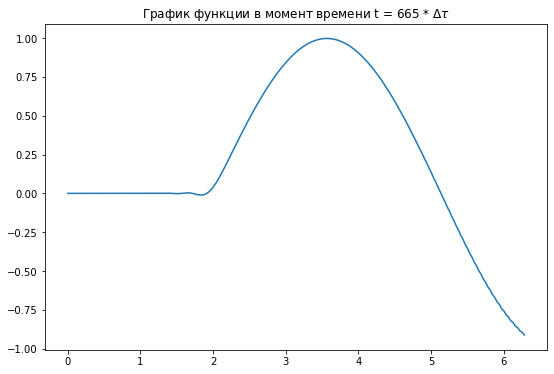

In [6]:
F_u = lambda u: u
w_x, u_0 = borgar_impl(lambda x: np.sin(x), lambda t: 0, lambda t: np.sin(2*np.pi-t), lambda u: 1, 200,
                     L=2*np.pi, tau=0.003, T=2, k_eps = 0.) 

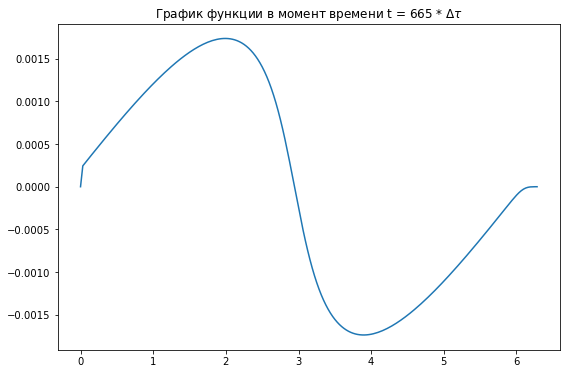

In [7]:
F_u = lambda u: u
w_x, u_0 = borgar_impl(lambda x: np.sin(x), lambda t: 0, lambda t: 0, lambda u: u, 200,
                     L=2*np.pi, tau=0.003, T=2, k_eps = 0.1)

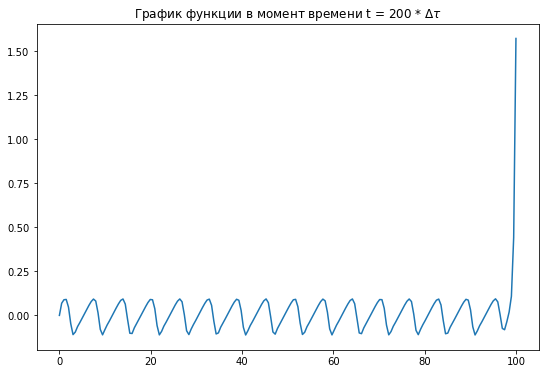

In [115]:
w_x, u_0 = borgar_impl(lambda x: np.sin(x), lambda t: 0, lambda t: np.pi/2, lambda u: u, 200,
                     L=100, tau=0.01, T=2, k_eps = 0.5) 

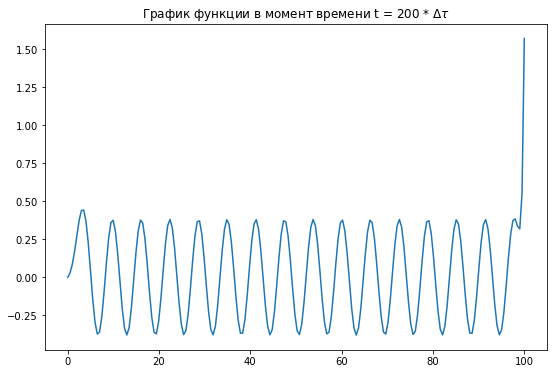

In [118]:
w_x, u_0 = borgar_expl(lambda x: np.sin(x), lambda t: 0, lambda t: np.pi/2, lambda u: u, 200,
                     L=100, tau=0.01, T=2, k_eps = 0.5) 